In [1]:
import pandas as pd

In [4]:
holidays_events = pd.read_csv("./data/holidays_events.csv")
oil = pd.read_csv("./data/oil.csv")
sample_submission = pd.read_csv("./data/sample_submission.csv")
stores = pd.read_csv("./data/stores.csv")
test = pd.read_csv("./data/test.csv")
train = pd.read_csv("./data/train.csv")
transactions = pd.read_csv("./data/transactions.csv")

In [19]:
# 메타데이터가 포함된 휴일 및 이벤트
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [9]:
# 일일 유가. 훈련 및 테스트 데이터 기간 동안의 값을 포함합니다. (에콰도르는 석유 의존도가 높은 국가로 경제적 건전성이 유가 충격에 매우 취약합니다.)
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
# 올바른 형식의 샘플 제출 파일.
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [418]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [14]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
# 훈련 데이터와 동일한 기능을 갖는 테스트 데이터. 이 파일의 날짜에 대한 목표 판매 를 예측 합니다.
# 테스트 데이터의 날짜는 훈련 데이터의 마지막 날짜 이후 15일 동안입니다.
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [15]:
# store_nbr , family 및 onpromotion 기능의 시계열 과 목표 판매 로 구성된 훈련 데이터 .
# store_nbr 은 제품이 판매되는 상점을 식별합니다.
# 제품군 은 판매되는 제품 유형을 식별합니다.
# 판매 는 지정된 날짜에 특정 상점에서 제품군에 대한 총 판매를 제공합니다. 제품을 분수 단위로 판매할 수 있으므로 분수 값이 가능합니다(예: 칩 1봉지와 반대되는 1.5kg의 치즈).
# onpromotion 은 특정 날짜에 매장에서 판촉된 제품군의 총 항목 수를 제공합니다.
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [180]:
store_nbr = train.groupby(["store_nbr"]).count().reset_index()

In [49]:
date = train.groupby(["date"]).count().reset_index()

In [68]:
family = train.groupby(["family"]).count().reset_index()

# 1. 점표별 일별 판매 갯수 확인

In [407]:
store = [] # 점포별로 나누기 store[1] = 1번 store[2] 2번 ...
store_name = "store_nbr_"
for i in range(len(store_nbr)+1):
    store.append(store_nbr_name + str(i))

In [408]:
for i in range(len(store_nbr)+1):
    store[i] = train[train["store_nbr"] == i]

In [409]:
# 일별 판매량 1월의 1일의 상품별 판매량

In [410]:
store_one = store[1] # 1번 점포

In [411]:
store_one[store_one['date'] == '2013-01-01']

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [412]:
# 1월 일별 상품 판매 갯수
sell_p = [] # 퍼센트
sell_c = [] # 갯수
for i in range(1,32):
    if i < 10:
        count = store_one[store_one['date'] == '2013-01-0' + str(i)]["sales"].values # 일별 제품별 판매량
        count_sum = count.sum() # 판매갯수 합
        sell_p.append(count / count_sum)
        sell_c.append(count)
    else:
        count = store_one[store_one['date'] == '2013-01-' + str(i)]["sales"].values
        count_sum = count.sum()
        sell_p.append(count / count_sum)
        sell_c.append(count)

C:\Users\JH\AppData\Local\Temp\ipykernel_4720\1597720412.py:8: RuntimeWarning: invalid value encountered in true_divide
  sell_p.append(count / count_sum)


In [414]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

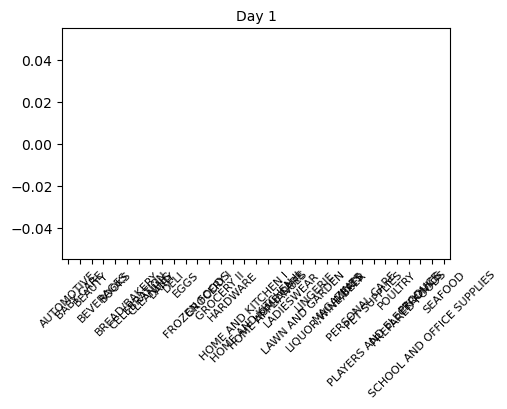

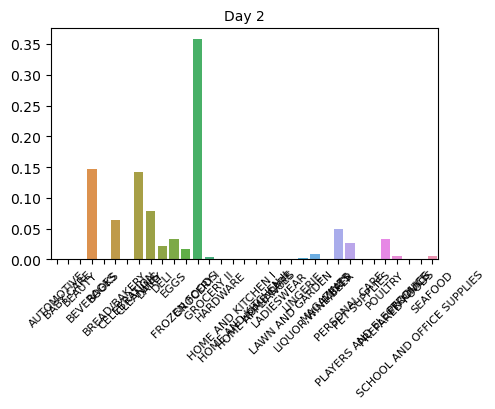

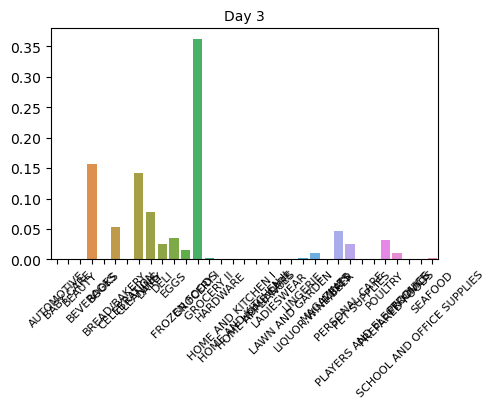

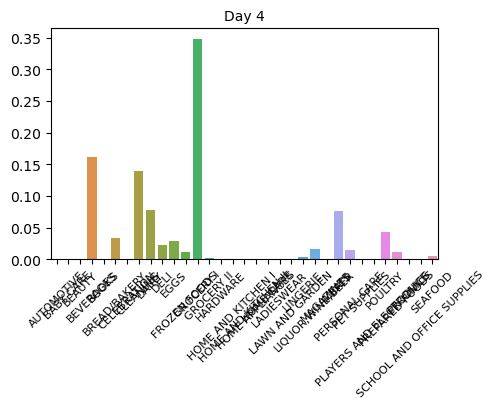

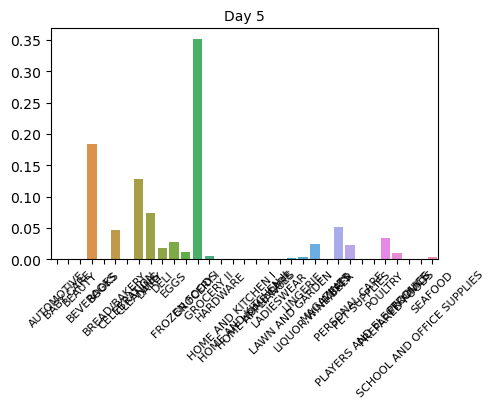

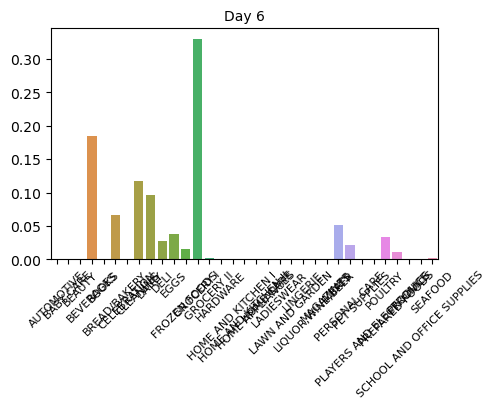

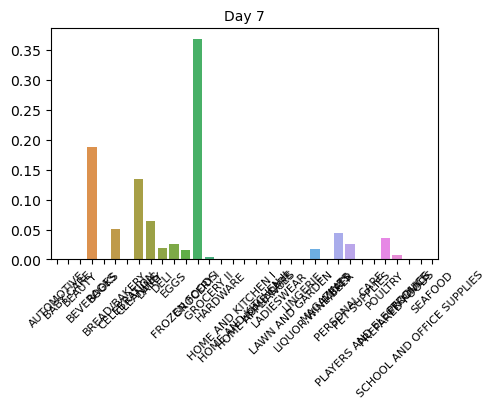

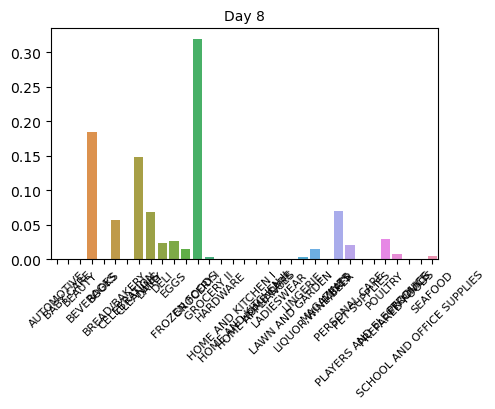

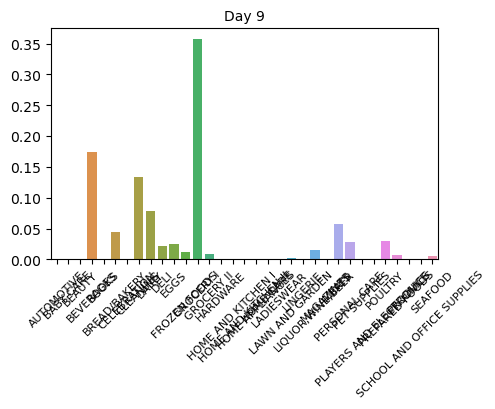

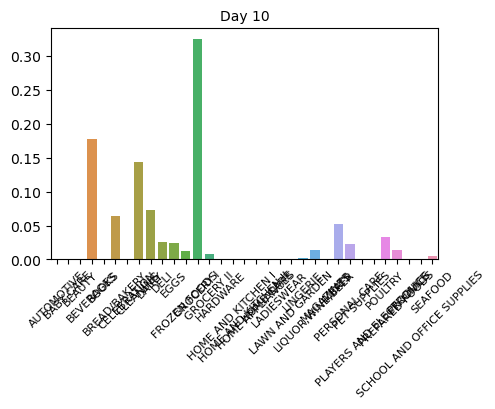

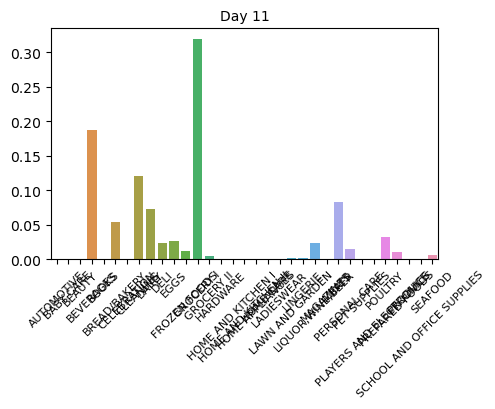

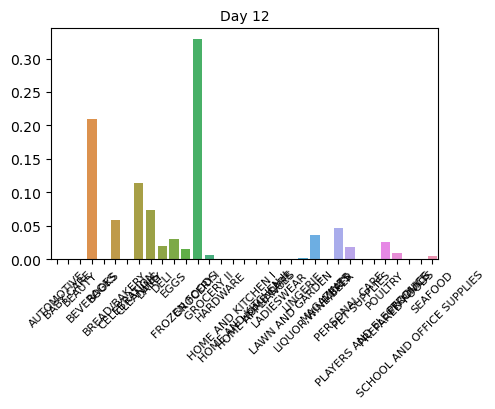

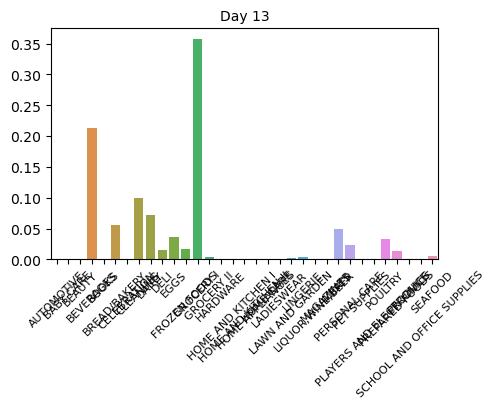

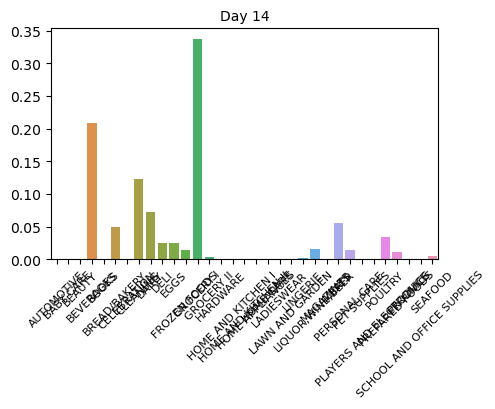

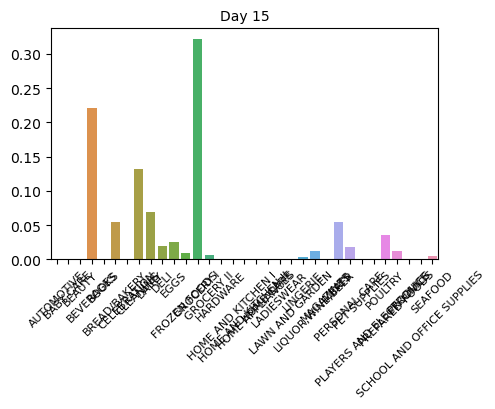

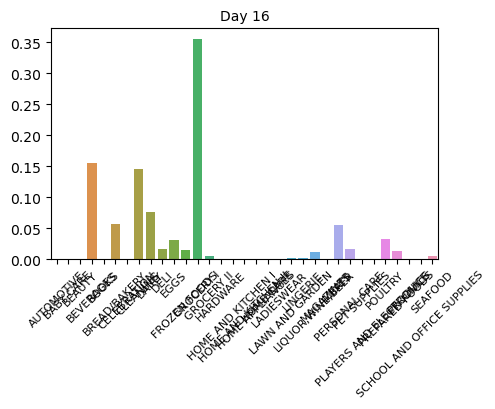

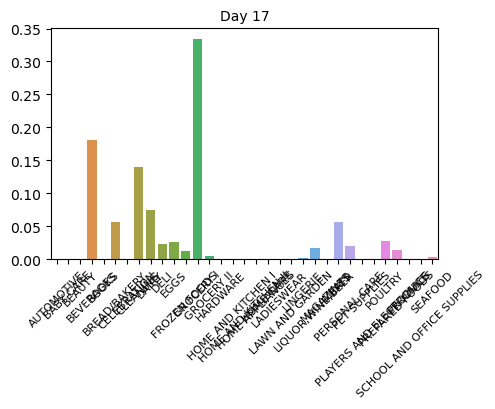

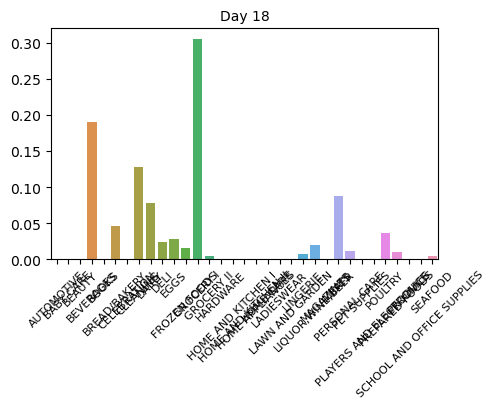

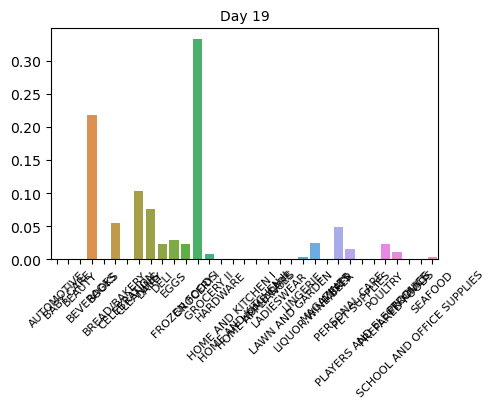

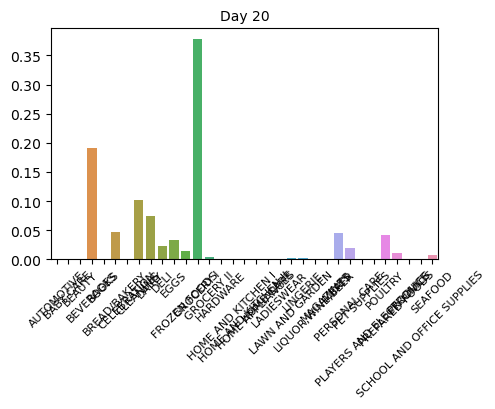

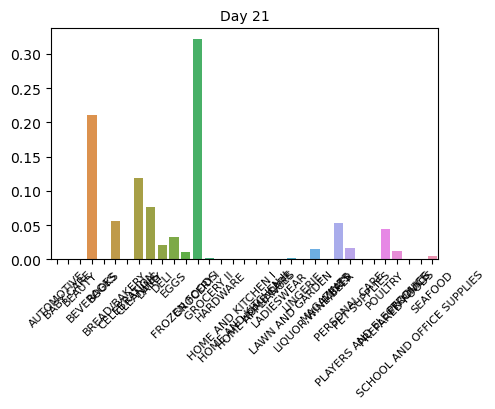

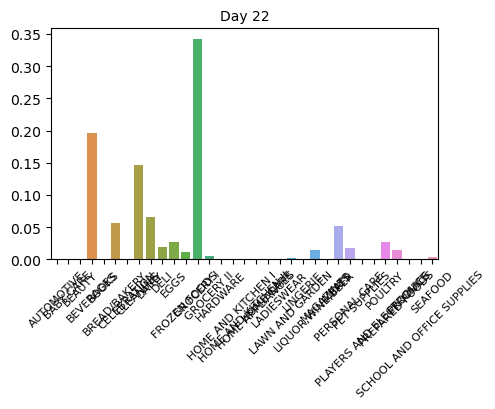

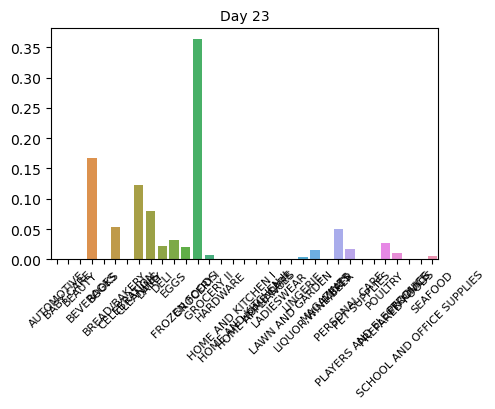

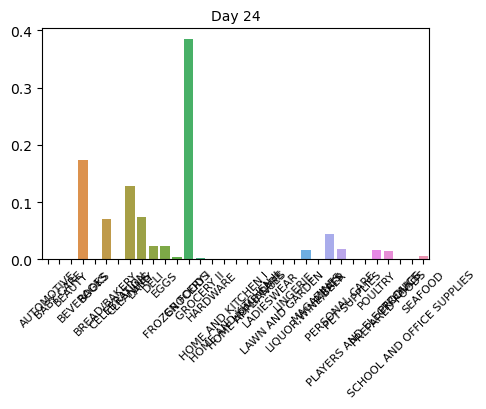

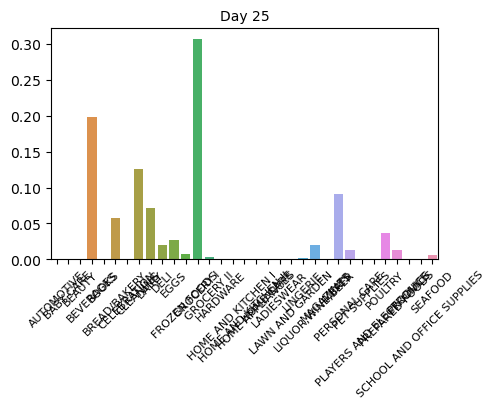

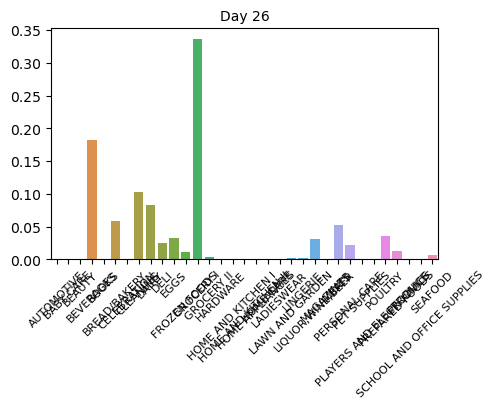

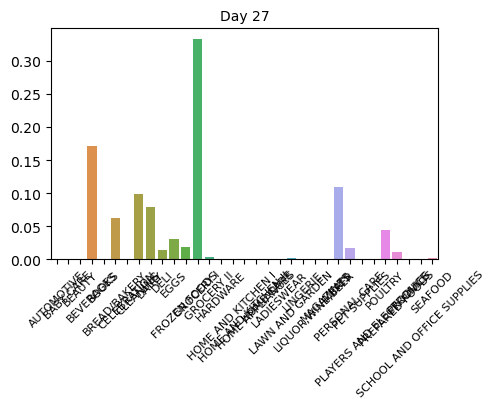

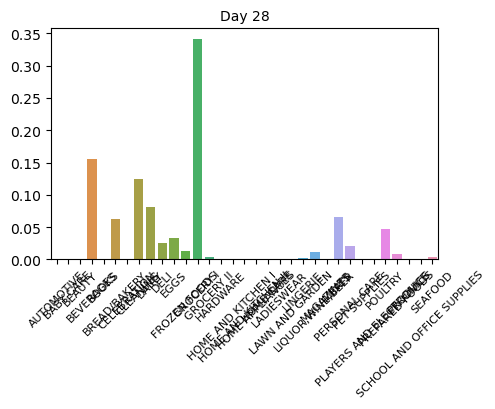

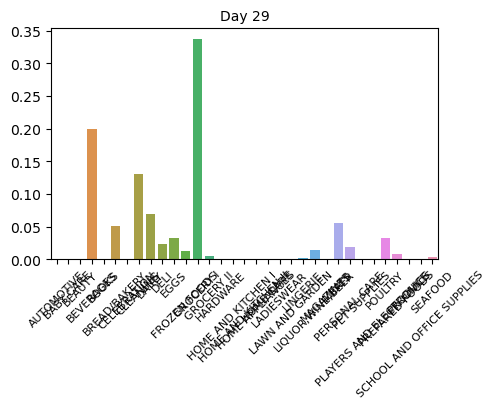

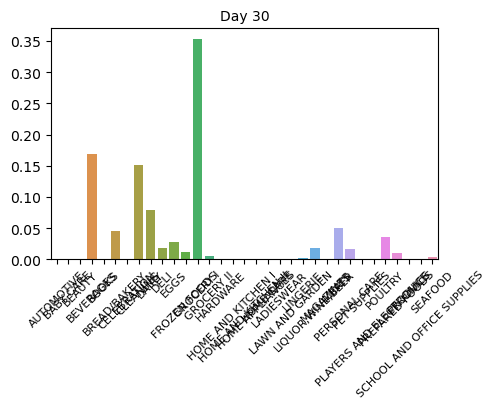

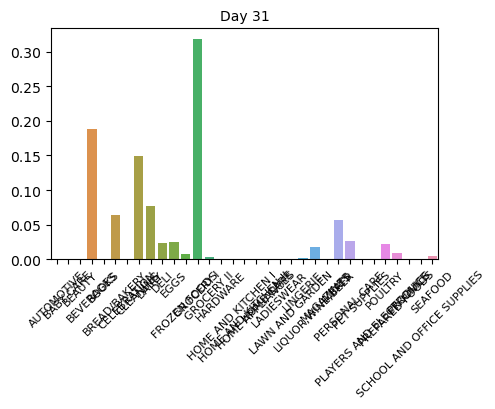

In [415]:
for i in range(1,32):
    plt.figure(figsize=(5, 3))
    plt.title('Day ' + str(i), fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    sns.barplot(x=family_values, y=sell_p[i-1])
    plt.show()